In [1]:
# Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv('salary.csv')
d

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,NaN
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,NaN,21.0
5,5,Russia,No,45000.0,NaN
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
8,8,Russia,Yes,NaN,45.0
9,9,Germany,Yes,67222.0,53.0


In [3]:
df_salary=pd.DataFrame(data=d)
df_salary

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,NaN
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,NaN,21.0
5,5,Russia,No,45000.0,NaN
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
8,8,Russia,Yes,NaN,45.0
9,9,Germany,Yes,67222.0,53.0


###   It is Categorical data thus i will use Logistic Regression and Classification Model.

In [4]:
df_salary.describe()

,index,salary,age
count,10.00000,8.000000,8.000000
mean,4.50000,60873.000000,34.750000
std,3.02765,20910.535349,16.104569
min,0.00000,34559.000000,21.000000
25%,2.25000,43750.000000,23.750000
50%,4.50000,61166.000000,25.000000
75%,6.75000,72386.000000,47.000000
max,9.00000,89993.000000,62.000000


In [5]:
df_salary.columns

Index(['index', 'Nation', 'purchased_item', 'salary', 'age'], dtype='object')

In [6]:
df_salary.isnull().sum()

index             0
Nation            0
purchased_item    0
salary            2
age               2
dtype: int64

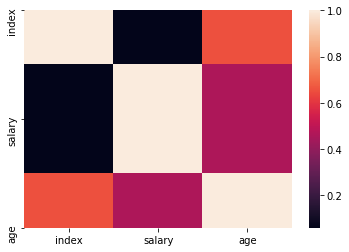

In [7]:
sns.heatmap(df_salary.corr())

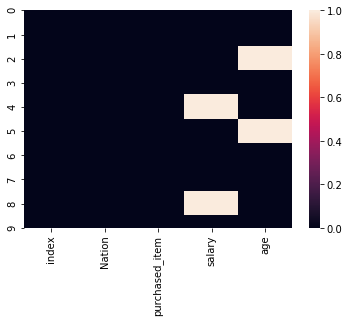

In [8]:
sns.heatmap(df_salary.isnull())

In [9]:
#using Label Encoder
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['purchased_item','Nation']
for val in list1:
    df_salary[val]=le.fit_transform(df_salary[val].astype(str))

In [10]:
df_salary

,index,Nation,purchased_item,salary,age
0,0,1,0,66777.0,23.0
1,1,2,1,87878.0,24.0
2,2,0,0,34559.0,NaN
3,3,1,1,40000.0,26.0
4,4,0,1,NaN,21.0
5,5,2,0,45000.0,NaN
6,6,0,1,89993.0,62.0
7,7,1,0,55555.0,24.0
8,8,2,1,NaN,45.0
9,9,0,1,67222.0,53.0


index                AxesSubplot(0.125,0.657941;0.352273x0.222059)
Nation            AxesSubplot(0.547727,0.657941;0.352273x0.222059)
purchased_item       AxesSubplot(0.125,0.391471;0.352273x0.222059)
salary            AxesSubplot(0.547727,0.391471;0.352273x0.222059)
age                     AxesSubplot(0.125,0.125;0.352273x0.222059)
dtype: object

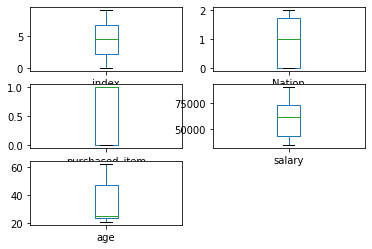

In [11]:
df_salary.plot(kind='box',subplots=True,layout=(3,2))

In [12]:
df_salary.corr()

,index,Nation,purchased_item,salary,age
index,1.000000,-0.104782,0.284268,0.058867,0.654998
Nation,-0.104782,1.000000,-0.098295,0.016185,-0.342803
purchased_item,0.284268,-0.098295,1.000000,0.531710,0.431160
salary,0.058867,0.016185,0.531710,1.000000,0.460022
age,0.654998,-0.342803,0.431160,0.460022,1.000000


In [13]:
d=df_salary.drop('Nation',axis=1)
d

,index,purchased_item,salary,age
0,0,0,66777.0,23.0
1,1,1,87878.0,24.0
2,2,0,34559.0,NaN
3,3,1,40000.0,26.0
4,4,1,NaN,21.0
5,5,0,45000.0,NaN
6,6,1,89993.0,62.0
7,7,0,55555.0,24.0
8,8,1,NaN,45.0
9,9,1,67222.0,53.0


(10, 4)

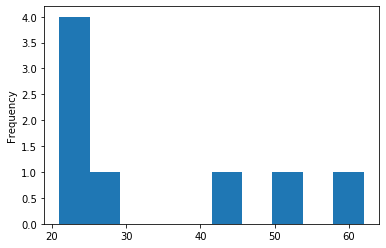

In [14]:
d['age'].plot.hist()
d.shape

In [15]:
# using imputer to fill null values with mean values
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp=imputer.fit(d)
df_data=imp.fit_transform(d.values)
print(df_data)
df_final=pd.DataFrame(data=df_data,columns=d.columns)
df_final

[[0.0000e+00 0.0000e+00 6.6777e+04 2.3000e+01]
 [1.0000e+00 1.0000e+00 8.7878e+04 2.4000e+01]
 [2.0000e+00 0.0000e+00 3.4559e+04 3.4750e+01]
 [3.0000e+00 1.0000e+00 4.0000e+04 2.6000e+01]
 [4.0000e+00 1.0000e+00 6.0873e+04 2.1000e+01]
 [5.0000e+00 0.0000e+00 4.5000e+04 3.4750e+01]
 [6.0000e+00 1.0000e+00 8.9993e+04 6.2000e+01]
 [7.0000e+00 0.0000e+00 5.5555e+04 2.4000e+01]
 [8.0000e+00 1.0000e+00 6.0873e+04 4.5000e+01]
 [9.0000e+00 1.0000e+00 6.7222e+04 5.3000e+01]]


,index,purchased_item,salary,age
0,0.0,0.0,66777.0,23.00
1,1.0,1.0,87878.0,24.00
2,2.0,0.0,34559.0,34.75
3,3.0,1.0,40000.0,26.00
4,4.0,1.0,60873.0,21.00
5,5.0,0.0,45000.0,34.75
6,6.0,1.0,89993.0,62.00
7,7.0,0.0,55555.0,24.00
8,8.0,1.0,60873.0,45.00
9,9.0,1.0,67222.0,53.00


In [16]:
df_final.dtypes

index             float64
purchased_item    float64
salary            float64
age               float64
dtype: object

In [17]:
df_final.isnull().sum()

index             0
purchased_item    0
salary            0
age               0
dtype: int64

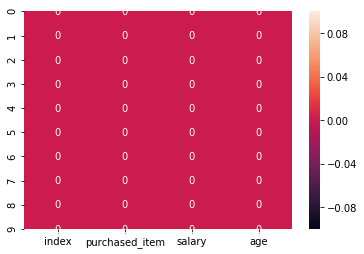

In [18]:
sns.heatmap(df_final.isnull(),annot=True)

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
index             10 non-null float64
purchased_item    10 non-null float64
salary            10 non-null float64
age               10 non-null float64
dtypes: float64(4)
memory usage: 448.0 bytes


In [20]:
df_final.skew()

index             0.000000
purchased_item   -0.484123
salary            0.296409
age               0.970209
dtype: float64

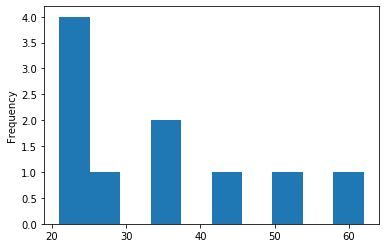

In [21]:
df_final['age'].plot.hist()

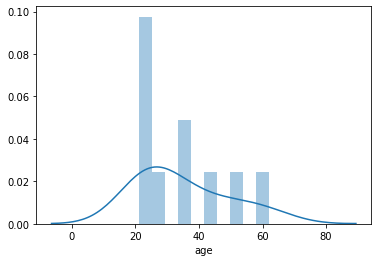

In [22]:
sns.distplot(df_final['age'],bins=10)

In [23]:
# removing Skewness
for i in df_final.columns:
    if df_final.skew().loc[i]>0.55:
        df_final[i]=np.log1p(df_final[i])

In [24]:
df_final.skew()

index             0.000000
purchased_item   -0.484123
salary            0.296409
age               0.599433
dtype: float64

In [25]:
df_final

,index,purchased_item,salary,age
0,0.0,0.0,66777.0,3.178054
1,1.0,1.0,87878.0,3.218876
2,2.0,0.0,34559.0,3.576550
3,3.0,1.0,40000.0,3.295837
4,4.0,1.0,60873.0,3.091042
5,5.0,0.0,45000.0,3.576550
6,6.0,1.0,89993.0,4.143135
7,7.0,0.0,55555.0,3.218876
8,8.0,1.0,60873.0,3.828641
9,9.0,1.0,67222.0,3.988984


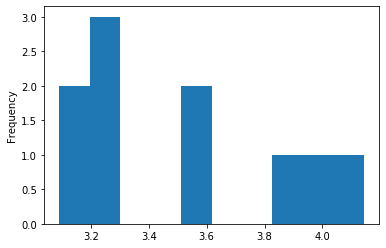

In [26]:
df_final['age'].plot.hist()

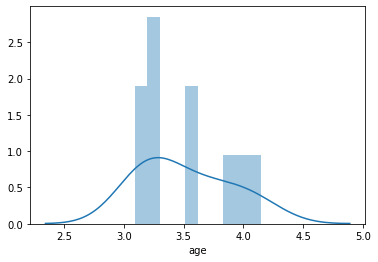

In [27]:
sns.distplot(df_final['age'],bins=10)

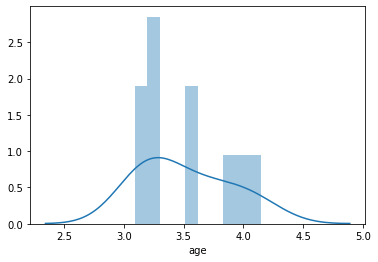

In [28]:
sns.distplot(df_final['age'],bins=10)

In [29]:
df_final

,index,purchased_item,salary,age
0,0.0,0.0,66777.0,3.178054
1,1.0,1.0,87878.0,3.218876
2,2.0,0.0,34559.0,3.576550
3,3.0,1.0,40000.0,3.295837
4,4.0,1.0,60873.0,3.091042
5,5.0,0.0,45000.0,3.576550
6,6.0,1.0,89993.0,4.143135
7,7.0,0.0,55555.0,3.218876
8,8.0,1.0,60873.0,3.828641
9,9.0,1.0,67222.0,3.988984


In [30]:
# removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df_final))
print(df_final.shape)
df_salary_new=df_final.loc[(z<3).all(axis=1)]
print(df_salary_new.shape)
df_salary_new

(10, 4)
(10, 4)


,index,purchased_item,salary,age
0,0.0,0.0,66777.0,3.178054
1,1.0,1.0,87878.0,3.218876
2,2.0,0.0,34559.0,3.576550
3,3.0,1.0,40000.0,3.295837
4,4.0,1.0,60873.0,3.091042
5,5.0,0.0,45000.0,3.576550
6,6.0,1.0,89993.0,4.143135
7,7.0,0.0,55555.0,3.218876
8,8.0,1.0,60873.0,3.828641
9,9.0,1.0,67222.0,3.988984


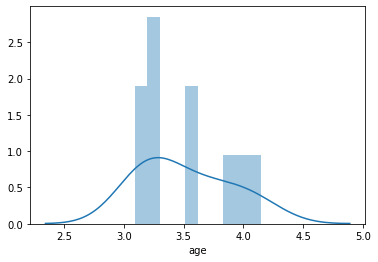

In [31]:
sns.distplot(df_salary_new['age'],bins=10)

In [32]:
y=df_salary_new['purchased_item']
y.shape

(10,)

In [33]:
x1=df_salary_new.iloc[: ,0:-1]
x1.shape
x1

,index,purchased_item,salary
0,0.0,0.0,66777.0
1,1.0,1.0,87878.0
2,2.0,0.0,34559.0
3,3.0,1.0,40000.0
4,4.0,1.0,60873.0
5,5.0,0.0,45000.0
6,6.0,1.0,89993.0
7,7.0,0.0,55555.0
8,8.0,1.0,60873.0
9,9.0,1.0,67222.0


In [34]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x

,index,purchased_item,salary
0,-1.566699,-1.224745,0.337468
1,-1.218544,0.816497,1.543583
2,-0.870388,-1.224745,-1.504086
3,-0.522233,0.816497,-1.193083
4,-0.174078,0.816497,0.000000
5,0.174078,-1.224745,-0.907287
6,0.522233,0.816497,1.664475
7,0.870388,-1.224745,-0.303972
8,1.218544,0.816497,0.000000
9,1.566699,0.816497,0.362903


In [35]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,cv):
    clf = GridSearchCV(mod,parameters, cv=5)
    clf.fit(x,y)
    print(clf.best_params_)

In [36]:
#     Grid Search for DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,5)


{'criterion': 'gini', 'max_depth': 4, 'random_state': 2}


In [37]:
#     Grid Search for GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(gbc,parameters,10)


{'learning_rate': 0.1, 'n_estimators': 100}


In [38]:
#     Grid Search for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,7)}
grid_cv(knn,parameters,10)

{'n_neighbors': 1}


In [39]:
#     Grid Search for SVC
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4]}
grid_cv(svc,parameters,10)

{'gamma': 0.001, 'random_state': 1}


In [40]:
#     Grid Search for LogisticRegression
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_cv(lr,parameters,10)

{'C': 0.1}


In [41]:
#     Grid Search for RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [100,200, 700,1000,2000],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,10)

{'max_features': 'auto', 'n_estimators': 100}


In [42]:
#           Defining Instances For Differnt Models.
KNN=KNeighborsClassifier(n_neighbors=1)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.1)
DT=DecisionTreeClassifier(max_depth=4,random_state=2)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.1,n_estimators=10)
RF=RandomForestClassifier(max_features='auto',n_estimators= 100,)

In [43]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
       # print('r2 score corresponding to random state ',r_state,'is: ',acc_score)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [44]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  42 is: 1.0


Learning Score :  1.0
Accuracy Score :  1.0


Cross Val Score :  1.0


roc auc score :  1.0


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Confusion Matrix:
 [[1 0]
 [0 2]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, ke

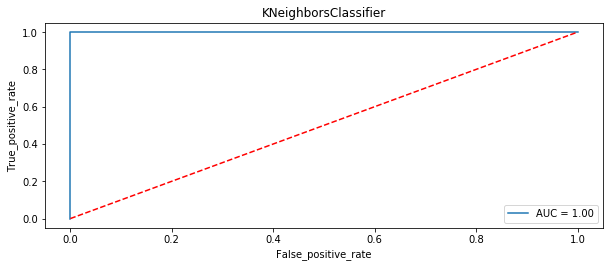

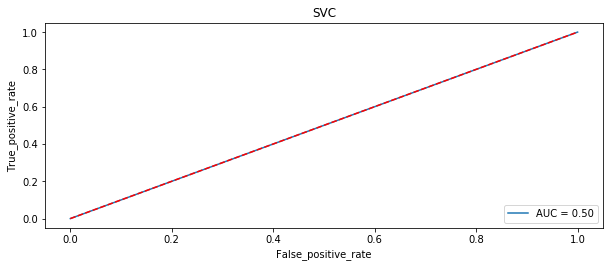

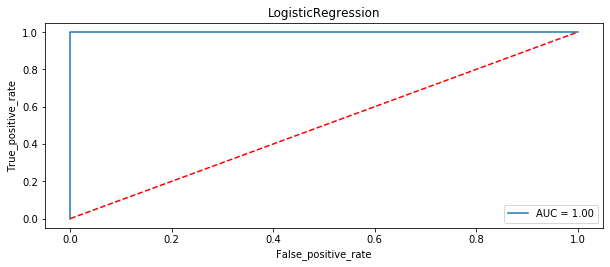

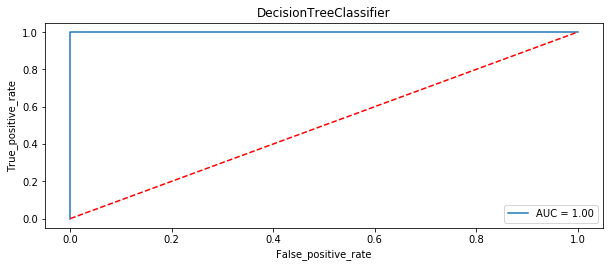

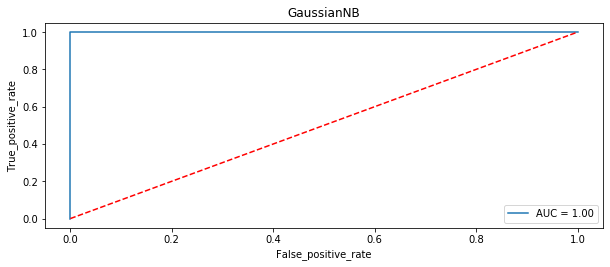

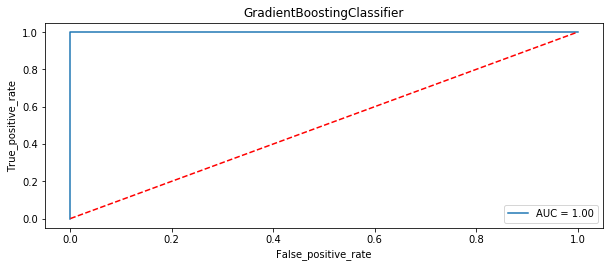

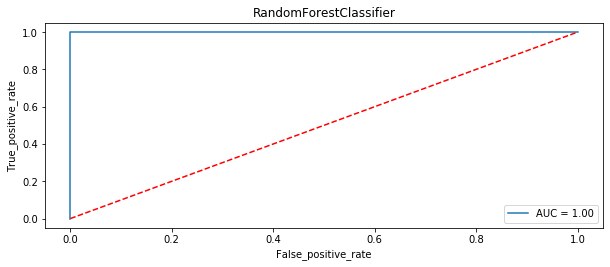

In [45]:
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
    score=model.score(x_test, y_test)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    print('\n')
    cv_score=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
    
#roc auc score    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')
    
    
    
    

In [46]:
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'Accuracy Score':Acc_score,'Cross Val Score':cvs,'Roc_Auc_curve':rocscore})  
result

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,100.000000,100.000000,100.000000,100.0
1,SVC,66.666667,66.666667,63.333333,50.0
2,LogisticRegression,100.000000,100.000000,100.000000,100.0
3,DecisionTreeClassifier,100.000000,100.000000,100.000000,100.0
4,GaussianNB,100.000000,100.000000,100.000000,100.0
5,GradientBoostingClassifier,100.000000,100.000000,86.666667,100.0
6,RandomForestClassifier,100.000000,100.000000,93.333333,100.0


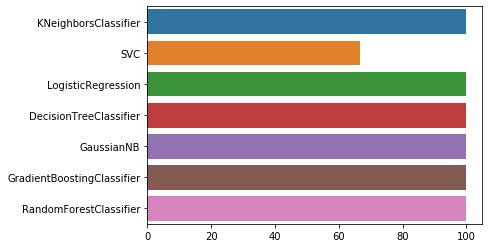

In [47]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

### After all this process conclusion is that GaussianNB, DecisionTree, KNeighbor, LogisticRegression are performing well.

In [48]:
#RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.22,stratify=y)
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rfpred=rf.predict(x_test)
print('Score:',rf.score(x_train,y_train))
print('Accuracy Score:',accuracy_score(y_test,rfpred))
print('Confusion Matrix:',confusion_matrix(y_test,rfpred))
print('Classification Report:',classification_report(y_test,rfpred))

Score: 1.0
Accuracy Score: 1.0
Confusion Matrix: [[1 0]
 [0 2]]
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



(2.0, 0.0)

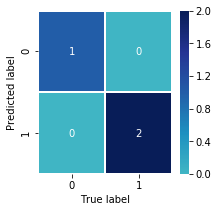

In [49]:
#plotting Confusion matrix
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, rfpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [52]:
test=pd.DataFrame(data=y_test)
test['ypred']=rfpred
test

,purchased_item,ypred
5,0.0,0.0
8,1.0,1.0
4,1.0,1.0


In [53]:
from sklearn.externals import joblib
joblib.dump(rf,'Salary_age_Dataset.pkl')

['Salary_age_Dataset.pkl']

In [54]:
final=joblib.load('Salary_age_Dataset.pkl')
final.predict(x_test)


array([0., 1., 1.])